In [113]:
import pandas as pd
import math
import numpy as np
import hurst
import matplotlib.pyplot as plt

In [120]:
data=pd.read_csv("^GSPC2.csv", parse_dates=['Date'])["Close"]

<AxesSubplot:>

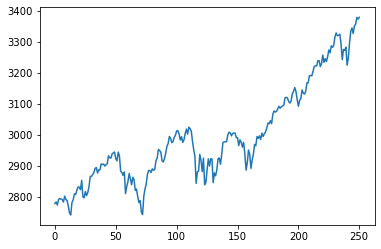

In [85]:
data.plot()

In [86]:
H, c, result = hurst.compute_Hc(data, kind='price', simplified=True)
print("H={:.3f}, c={:.3f}".format(H,c))

H=0.512, c=1.379


In [121]:
x=np.log(data/data.shift(1))[1:]

In [122]:
def hurst(X):
    n=len(X)
    m=X.mean()
    Y=X-m
    S=[sum(Y[:i]) for i in range(len(Y))]
    print(max(S),min(S))
    R_n=[(max(S[:i])-min(S[:i])) for i in range(1,n)]
    S_n=[X[:i].std() for i in range(1,n)]
    r_s=[]
    for i in range(len(R_n)):
        r_s.append(R_n[i]/S_n[i])
    return r_s

In [123]:
y=hurst(data)
len(y)

0 -15700.275308633483


250

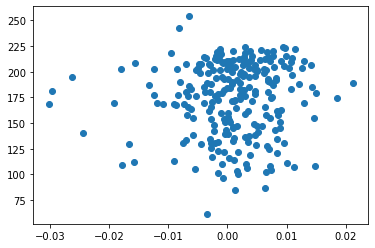

In [124]:
plt.scatter(x,y)